In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Setup Tickers

In [5]:
from stockMarket.stockData import StockData

stock_data = StockData("S&P500")

### Download XML Files of Tickers

In [2]:
from stockMarket.ib import StoreXMLData

storeXMLData = StoreXMLData(stock_data.companies)
storeXMLData.save_xml_data()
storeXMLData._save_xml_files()

### Retrieve historical data from IB

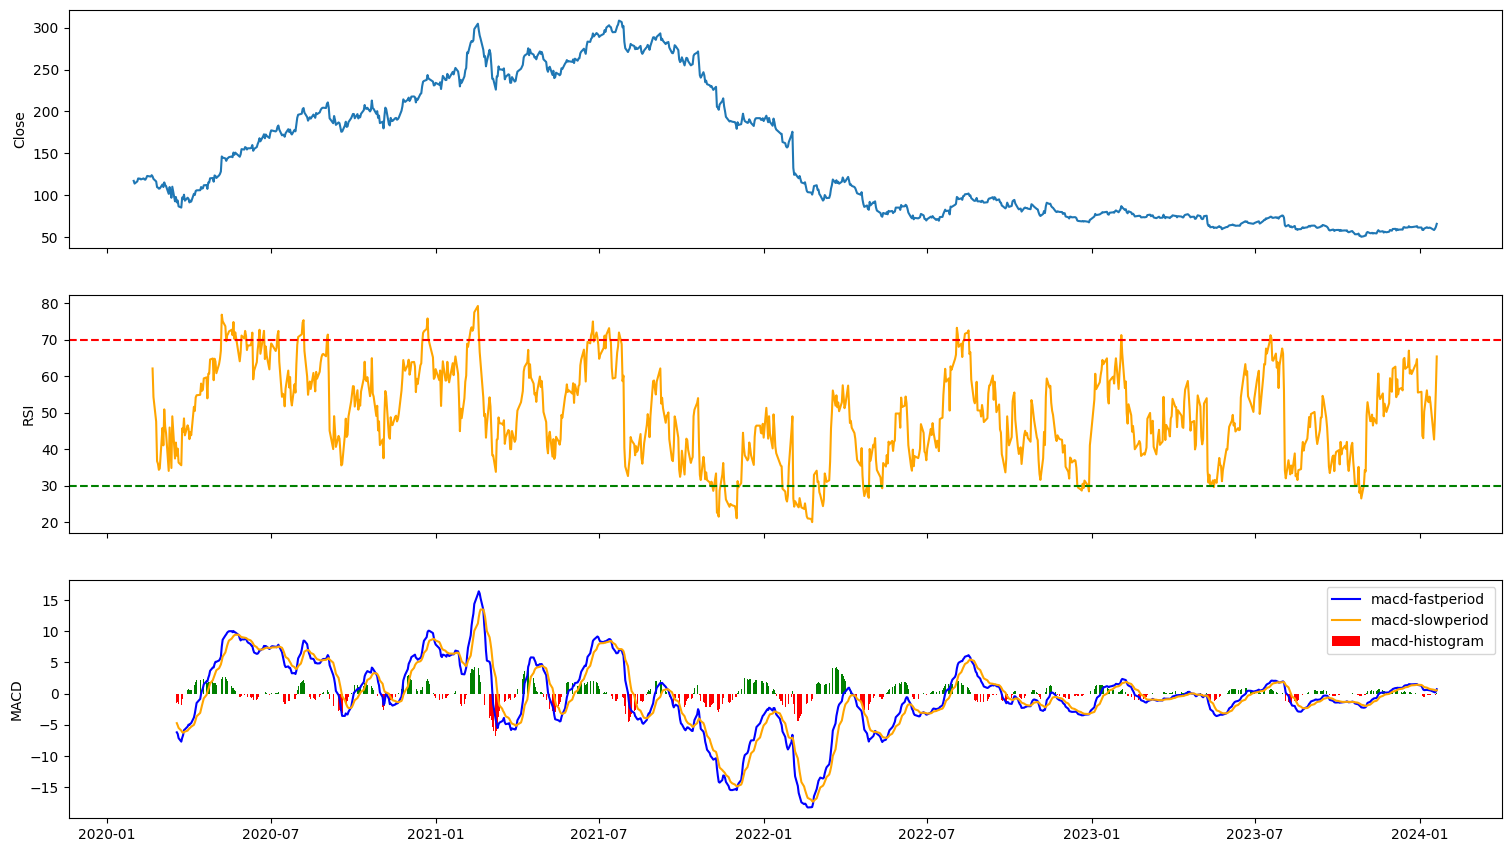

In [13]:
from tvDatafeed import TvDatafeed, Interval
import talib
import matplotlib.pyplot as plt
import numpy as np

tv = TvDatafeed()

data = tv.get_hist(symbol="PYPL", exchange="NASDAQ", interval=Interval.in_daily, n_bars=1000)

data["close"]
rsi = talib.RSI(data["close"], timeperiod=14)
macd = talib.MACD(data["close"], fastperiod=12, slowperiod=26, signalperiod=9)

fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(data["close"])
ax[0].set_ylabel("Close")

ax[1].plot(rsi, c="orange")
ax[1].axhline(y=70, c="red", linestyle="--")
ax[1].axhline(y=30, c="green", linestyle="--")
ax[1].set_ylabel("RSI")

colormat=np.where(macd[2]>0, 'g','r')
ax[2].plot(macd[0], c="blue", label="macd-fastperiod")
ax[2].plot(macd[1], c="orange", label="macd-slowperiod")
ax[2].bar(macd[2].index, macd[2].values, color=colormat, label="macd-histogram")
ax[2].set_ylabel("MACD")
ax[2].legend(loc="upper right")

fig.set_size_inches(18.5, 10.5)
plt.show()


### Retrieve Financial Data

In [12]:
from stockMarket.ib.finReports import FinReports

fin_reports = FinReports(stock_data.companies)
fin_reports.populate_contracts()
print(fin_reports.contracts[0].ticker)
print(fin_reports.contracts[0].income.revenue)
print(len(fin_reports.contracts))

MMM
[34229.0, 35355.0, 32184.0, 32136.0, 32765.0, 31657.0]
503
